In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# Load the dataset
df = pd.read_csv('sample (1).csv')

# Display the first few rows of the dataset
df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,72565003017,2018-01-01,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",11.6,24,5.5,24,...,9.9,999.9,28.0,,3.0,,0.0,G,999.9,1000
1,72565003017,2018-01-02,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",21.2,24,7.3,24,...,9.9,999.9,43.0,,3.0,,0.0,G,999.9,0
2,72565003017,2018-01-03,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",31.8,24,3.0,24,...,15.9,24.1,53.1,,10.9,,0.0,G,999.9,0
3,72565003017,2018-01-04,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",34.6,24,11.6,24,...,8.9,999.9,53.1,,17.1,,0.0,G,999.9,0
4,72565003017,2018-01-05,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",36.3,24,11.4,24,...,14.0,999.9,55.9,,23.0,,0.0,G,999.9,0


In [112]:
# Data Cleaning
# Replace placeholder values with NaN
df.replace(999.9, np.nan, inplace=True)

# Convert DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Display summary statistics
df.describe()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
count,3.650000e+02,365,3.650000e+02,3.650000e+02,3.650000e+02,365.000000,365.0,365.000000,365.0,364.000000,...,365.0,365.000000,365.0,365.000000,255.000000,365.000000,365.000000,365.000000,18.000000,365.000000
mean,7.256500e+10,2018-07-02 00:00:00,3.983280e+01,-1.046575e+02,1.650200e+03,51.808767,24.0,29.516164,24.0,1013.821429,...,24.0,8.896164,24.0,18.463562,29.417647,97.393425,36.538082,0.024082,1.694444,12382.684932
min,7.256500e+10,2018-01-01 00:00:00,3.983280e+01,-1.046575e+02,1.650200e+03,5.000000,24.0,-4.100000,24.0,996.900000,...,24.0,4.100000,24.0,7.000000,14.000000,19.000000,-7.100000,0.000000,1.200000,0.000000
25%,7.256500e+10,2018-04-02 00:00:00,3.983280e+01,-1.046575e+02,1.650200e+03,36.400000,24.0,18.100000,24.0,1009.075000,...,24.0,7.200000,24.0,14.000000,22.900000,55.900000,23.000000,0.000000,1.200000,0.000000
50%,7.256500e+10,2018-07-02 00:00:00,3.983280e+01,-1.046575e+02,1.650200e+03,50.700000,24.0,28.500000,24.0,1013.500000,...,24.0,8.400000,24.0,18.100000,28.900000,69.100000,34.000000,0.000000,1.200000,0.000000
75%,7.256500e+10,2018-10-01 00:00:00,3.983280e+01,-1.046575e+02,1.650200e+03,68.000000,24.0,42.300000,24.0,1018.625000,...,24.0,10.200000,24.0,22.900000,34.000000,88.000000,53.100000,0.000000,2.000000,10000.000000
max,7.256500e+10,2018-12-31 00:00:00,3.983280e+01,-1.046575e+02,1.650200e+03,85.300000,24.0,61.500000,24.0,1038.300000,...,24.0,23.200000,24.0,40.000000,58.100000,9999.900000,68.000000,0.660000,3.900000,111110.000000
std,0.000000e+00,NaN,1.067277e-13,5.549841e-13,9.107432e-13,18.124424,0.0,14.705844,0.0,7.087589,...,0.0,2.557619,0.0,5.965433,8.253782,520.079364,17.158441,0.078939,0.841198,30573.651227


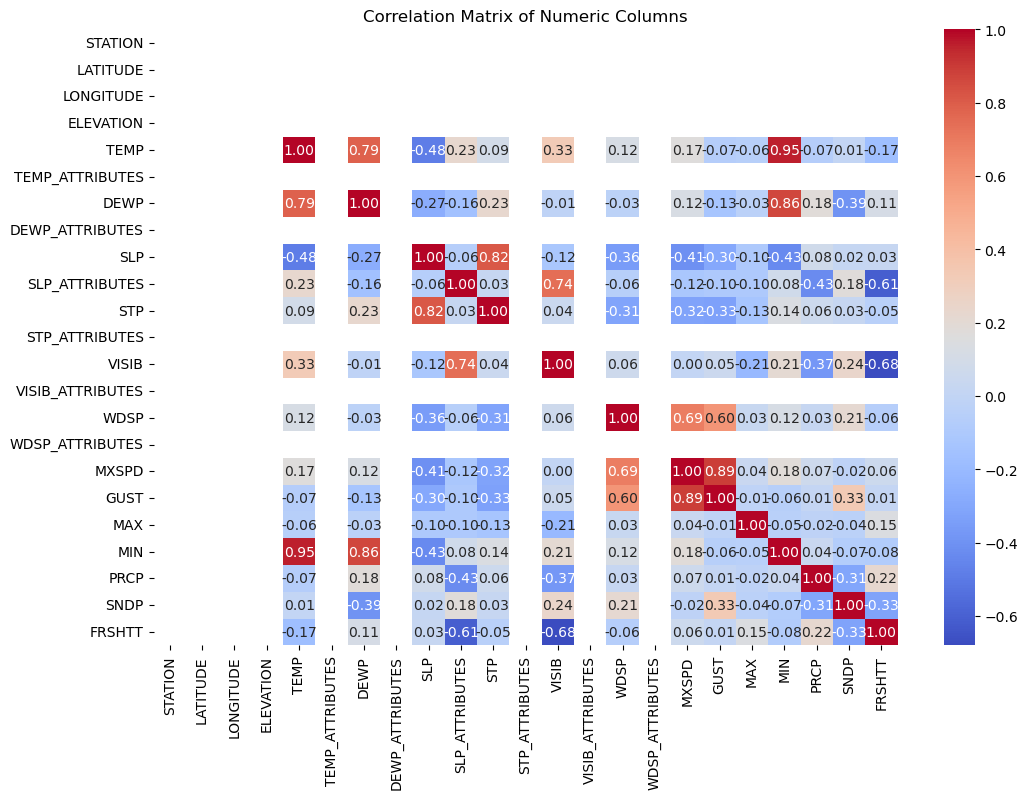

In [114]:
# Correlation Analysis
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

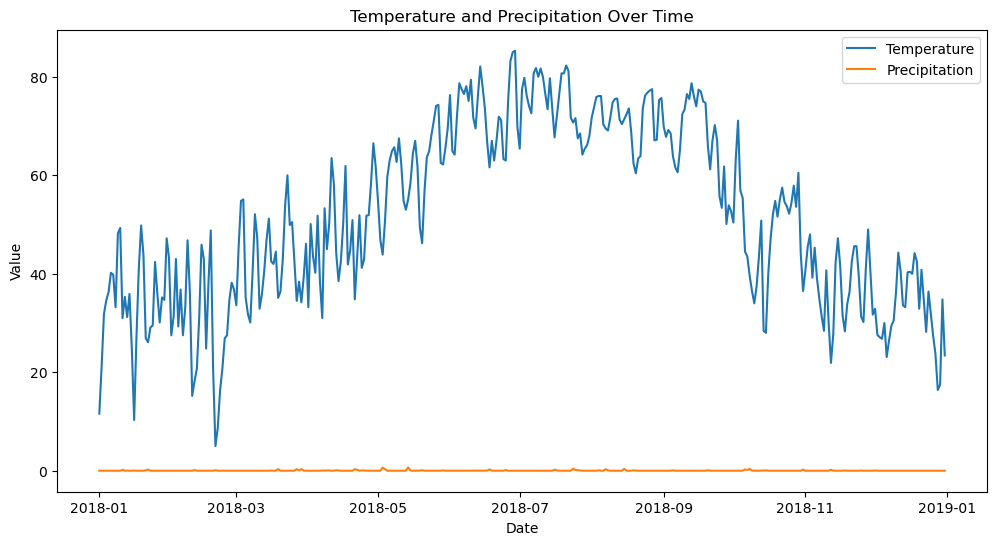

In [116]:
# Time Series Analysis
# Plot temperature and precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['TEMP'], label='Temperature')
plt.plot(df['DATE'], df['PRCP'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Temperature and Precipitation Over Time')
plt.legend()
plt.show()

In [118]:
# Feature Engineering
# Extract month and day of the week from the DATE column
df['MONTH'] = df['DATE'].dt.month
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek

# Display the updated dataframe
df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT,MONTH,DAY_OF_WEEK
0,72565003017,2018-01-01,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",11.6,24,5.5,24,...,28.0,,3.0,,0.0,G,NaN,1000,1,0
1,72565003017,2018-01-02,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",21.2,24,7.3,24,...,43.0,,3.0,,0.0,G,NaN,0,1,1
2,72565003017,2018-01-03,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",31.8,24,3.0,24,...,53.1,,10.9,,0.0,G,NaN,0,1,2
3,72565003017,2018-01-04,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",34.6,24,11.6,24,...,53.1,,17.1,,0.0,G,NaN,0,1,3
4,72565003017,2018-01-05,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",36.3,24,11.4,24,...,55.9,,23.0,,0.0,G,NaN,0,1,4


Mean Squared Error: 65.61308620023794


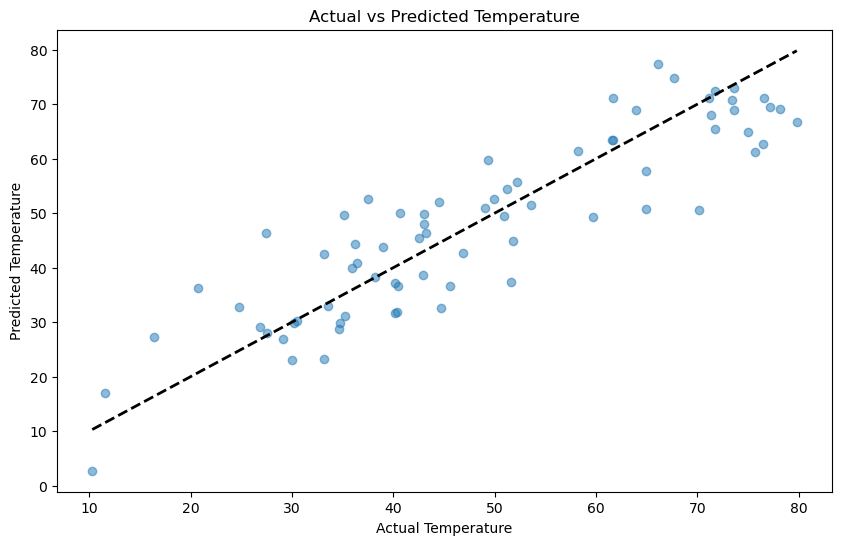

In [124]:
#  Predictive Modeling (Linear Regression)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('sample (1).csv')

# Data Cleaning
# Replace placeholder values with NaN
df.replace(999.9, np.nan, inplace=True)

# Convert DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Feature Engineering
df['MONTH'] = df['DATE'].dt.month
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek

# Handle Missing Values
# Option 1: Drop rows with missing values
# df_cleaned = df.dropna()

# Option 2: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = df[['MONTH', 'DAY_OF_WEEK', 'DEWP', 'SLP']]
y = df['TEMP']

# Impute missing values in X
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

Mean Squared Error: 65.61308620023794


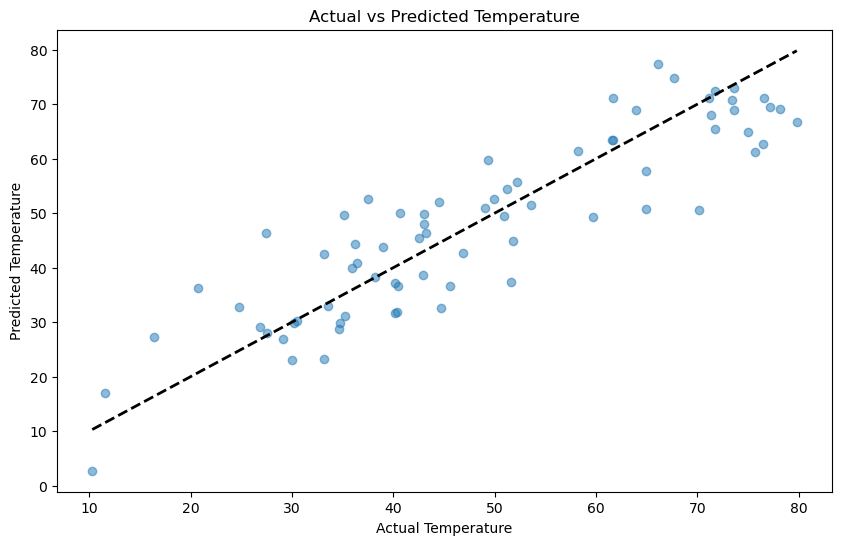

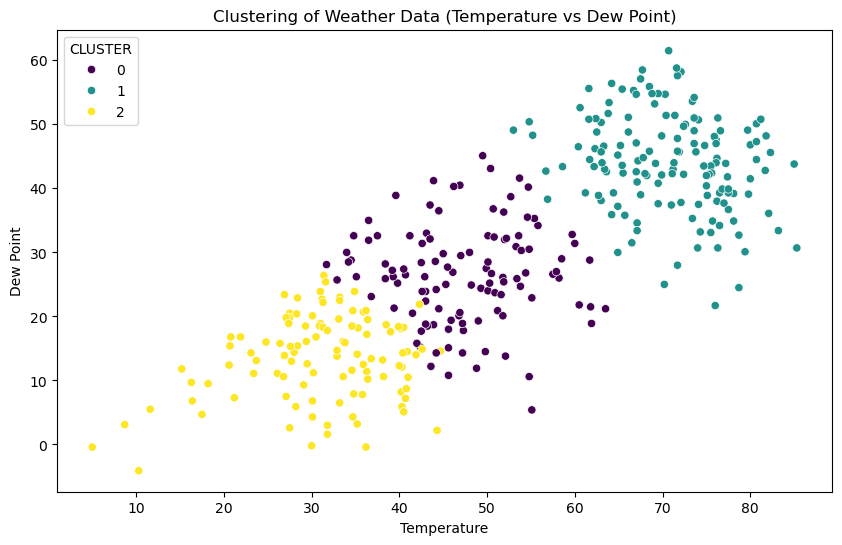

In [128]:
# Clustering (K-Means)

from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('sample (1).csv')

# Data Cleaning
# Replace placeholder values with NaN
df.replace(999.9, np.nan, inplace=True)

# Convert DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Feature Engineering
df['MONTH'] = df['DATE'].dt.month
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek

# Handle Missing Values
# Option 1: Drop rows with missing values
# df_cleaned = df.dropna()

# Option 2: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = df[['MONTH', 'DAY_OF_WEEK', 'DEWP', 'SLP']]
y = df['TEMP']

# Impute missing values in X
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

# Clustering (Example: K-Means)
# Prepare data for clustering
X_cluster = df[['TEMP', 'DEWP', 'SLP']]

# Impute missing values in X_cluster
X_cluster_imputed = imputer.fit_transform(X_cluster)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3)
df['CLUSTER'] = kmeans.fit_predict(X_cluster_imputed)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='DEWP', hue='CLUSTER', data=df, palette='viridis')
plt.title('Clustering of Weather Data (Temperature vs Dew Point)')
plt.xlabel('Temperature')
plt.ylabel('Dew Point')
plt.show()